# Рубежный контроль №2

### Загружаем библиотеки

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt

### Загружаем данные

In [19]:
df = pd.read_csv('Admission_Predict.csv')

In [20]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


#### Разделим на обучающую и тестовую выборку

In [25]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(
    df.drop(columns='Chance of Admit '), df['Chance of Admit '], test_size=0.2, random_state=171)

### Дерево решений 

In [32]:
tree = DecisionTreeRegressor()
tree.fit(df_X_train, df_y_train)

DecisionTreeRegressor()

In [33]:
tree_predict = tree.predict(df_X_test)

### Случаный лес

In [35]:
forest = RandomForestRegressor()
forest.fit(df_X_train, df_y_train)

RandomForestRegressor()

In [36]:
forest_predict = forest.predict(df_X_test)

### Оценка моделей

Для оценки будем использовать три метрики: **Средняя квадратичная ошибка**, **Средняя абсолютная ошибка**, **R2 score**.

In [37]:
def plot_metrics(metrics, models, test_y):
    for name, fun in metrics.items():
        fig, ax = plt.subplots(figsize=(10,10))
        results_metrics = []
        
        for nm, results in models.items():
            results_metrics.append(fun(test_y, results))
    
        sorted_el = list(sorted(list(zip(models.keys(), results_metrics)), key=lambda x: -x[1]))
        results_metrics = list(map(lambda x: x[1], sorted_el))
        model_list = list(map(lambda x: x[0], sorted_el))
        
        pos = np.arange(len(model_list))
        rects = ax.barh(pos, results_metrics,
                     align='center',
                     height=0.5, 
                     tick_label=model_list)
        ax.set_title(name)
        for a, b in zip(pos, results_metrics):
            plt.text(max(results_metrics) * 0.1, a-0.05, str(round(b,6)), color='black')
        plt.show() 

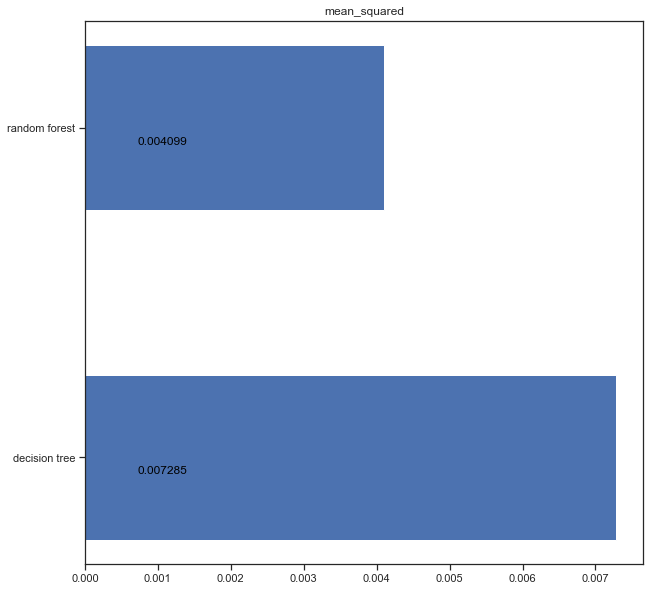

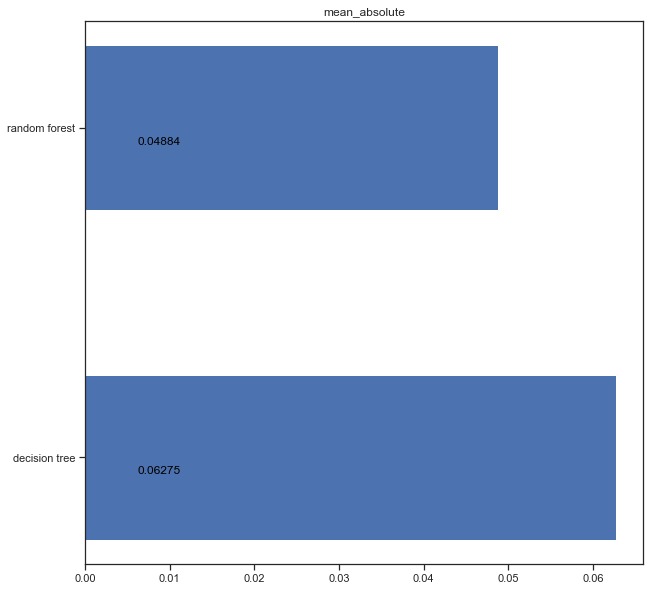

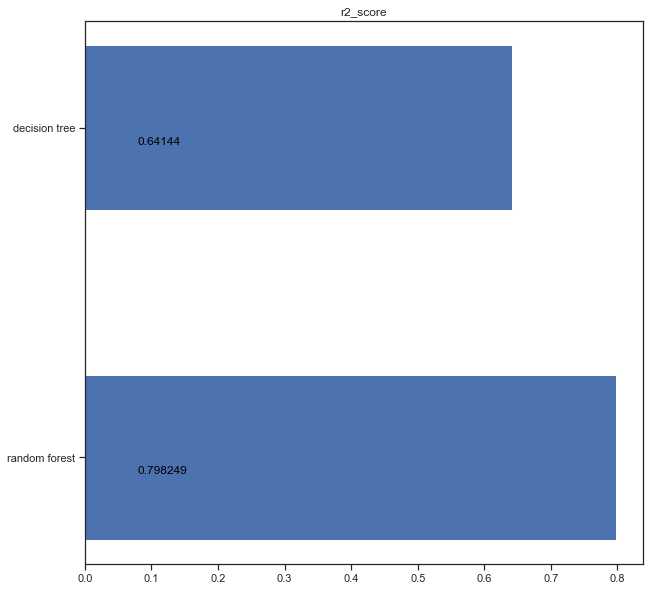

In [39]:
metrics = {
    'mean_squared':mean_squared_error,
    'mean_absolute':mean_absolute_error,
    'r2_score':r2_score
}

predictions = {
    'decision tree': tree_predict,
    'random forest': forest_predict
}

plot_metrics(metrics, predictions, df_y_test)

Случаный лес лучше работает на данном наборе данных, что логично т.к. она явялется ансамблей моделей.